<a href="https://colab.research.google.com/github/HammadN98/pos/blob/main/introducao_python/An%C3%A1lise_de_dados_Nimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTÕES ABERTAS PARA PYTHON Análise de dados


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/HammadN98/pos/refs/heads/main/introducao_python/dados/Exercicio%20Aberto.csv"
dados = pd.read_csv(url)
dados.head()

,Nome do Produto,Nome do Produtor,Moeda,Valor do Produto,Data de Venda,id_comprador,Idade,Localização,Tipo de Pagamento
0,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,142,23.0,São Paulo,Cartão de Crédito
1,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,158,29.0,Minas Gerais,Pix
2,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,175,NaN,MINAS GERAIS,Boleto
3,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,37,26.0,MINAS GERAIS,Boleto
4,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,25/05/2021,49,26.0,MINAS GERAIS,Cartão de Crédito


In [ ]:
print(dados.shape)

(351, 9)


In [ ]:
dados.dropna(inplace=True)
dados.shape

(327, 9)

## 1. Utilizando Python, responda às seguintes perguntas:
- a. Qual a média das idades dos compradores?

- b. Quem é o comprador mais velho e o mais novo?
   
- c. Qual produto teve mais vendas?

In [ ]:
print(f"A media das idades corresponde a: {dados['Idade'].mean():.0f} anos") #Sem decimais ja que idade nao tem quebrado

A media das idades corresponde a: 26 anos


In [ ]:
print(f"A pessoa mais velha a realizar uma compra tinha a idade de: {dados['Idade'].max()} anos")



A pessoa mais velha a realizar uma compra tinha a idade de: 60.0 anos


In [ ]:
dados['Idade'].min() #Ao utilizar os dados sem algum tratamento, ira devolver que a pessoa mais nova a realizaruma compra foi com 0 anos. O que sabemos que nao eh possivel

0.0

In [ ]:
dados_sem_zero = dados.loc[dados['Idade'] > 0]
print(f"A pessoa mais nova a realizar uma compra tinha a idade de: {dados_sem_zero['Idade'].min()}")

A pessoa mais nova a realizar uma compra tinha a idade de: 19.0


In [ ]:
mais_vendas = dados['Nome do Produto'].value_counts().iloc[0]
mais_nome = dados['Nome do Produto'].value_counts().idxmax()
print(f"O produto mais vendido eh: {mais_nome}, com uma quantidade de {mais_vendas} itens vendidos")

O produto mais vendido eh: Mentoria Apollo 11, com uma quantidade de 230 itens vendidos


## 2.
Utilizando Python, mostre em um gráfico qual foi o método de pagamento
mais utilizado pelos compradores.

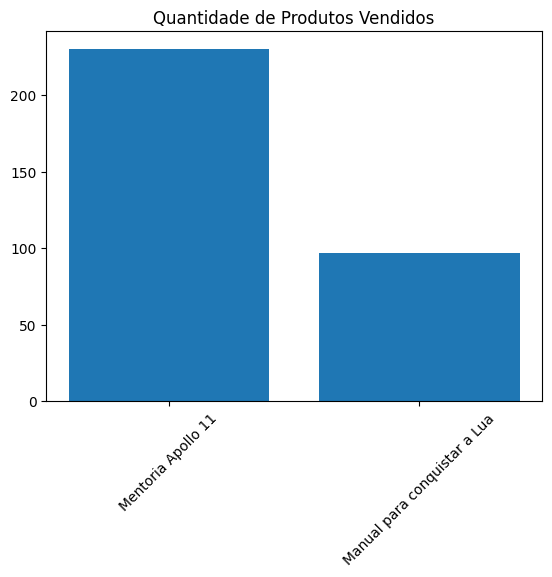

In [ ]:
contagem_produtos = dados['Nome do Produto'].value_counts()

plt.bar(contagem_produtos.index, contagem_produtos.values)
plt.title('Quantidade de Produtos Vendidos')
plt.xticks(rotation=45)
plt.show()


##3. Utilizando Python, mostre em um gráfico a quantidade de vendas por mês.


<BarContainer object of 2 artists>

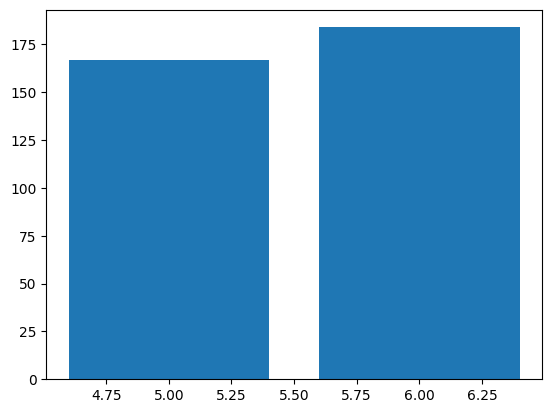

In [ ]:
#dados['Data de Venda'] = pd.to_datetime(dados['Data de Venda'])

#dados_grupo = dados.groupby('Data de Venda')[]
dados['Mes'] = dados['Data de Venda'].dt.month
dados['Mes'].unique()

#contagem_tempo = dados['Mes'].value_counts()
#plt.bar(contagem_tempo, contagem_tempo.values)

contagem_tempo = dados['Mes'].value_counts().sort_index()

# Criando o gráfico de barras
plt.bar(contagem_tempo.index, contagem_tempo.values)


In [ ]:
dados

,Nome do Produto,Nome do Produtor,Moeda,Valor do Produto,Data de Venda,id_comprador,Idade,Localização,Tipo de Pagamento,Mês,Mes
0,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,2021-05-25,142,23.0,São Paulo,Cartão de Crédito,5,5
1,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,2021-05-25,158,29.0,Minas Gerais,Pix,5,5
2,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,2021-05-25,175,NaN,MINAS GERAIS,Boleto,5,5
3,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,2021-05-25,37,26.0,MINAS GERAIS,Boleto,5,5
4,Manual para conquistar a Lua,Neil Armstrong,BRL,250.0,2021-05-25,49,26.0,MINAS GERAIS,Cartão de Crédito,5,5
...,...,...,...,...,...,...,...,...,...,...,...
346,Mentoria Apollo 11,Neil Armstrong,BRL,1997.0,2021-06-08,39,23.0,Distrito Federal,Cartão de Crédito,6,6
347,Mentoria Apollo 11,Neil Armstrong,BRL,1997.0,2021-06-08,247,29.0,Goiás,Cartão de Crédito,6,6
348,Mentoria Apollo 11,Neil Armstrong,BRL,1997.0,2021-06-08,43,31.0,GOIÁS,Pix,6,6
349,Mentoria Apollo 11,Neil Armstrong,BRL,1997.0,2021-06-08,78,45.0,GOIÁS,Pix,6,6


ValueError: x and y must have same first dimension, but have shapes (327,) and (15,)

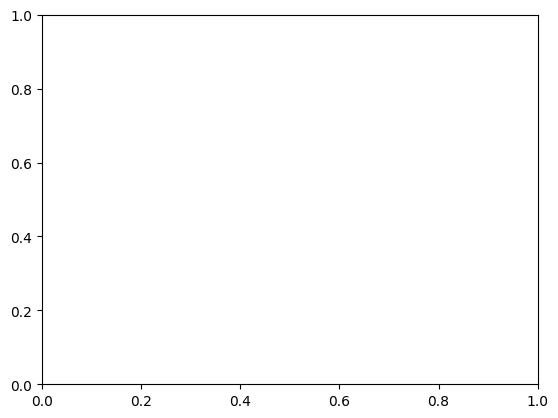

In [ ]:
contagem_vendas = dados['Data de Venda'].value_counts()

plt.plot(dados['Data de Venda'].index, contagem_vendas.values)
plt.title('Quantidade de Produtos Vendidos')
plt.xticks(rotation=45)
plt.show()

In [ ]:
meses = dados['Data de Venda'].value_counts()
meses

## 4. Utilizando Python, mostre em um gráfico as vendas por estado.


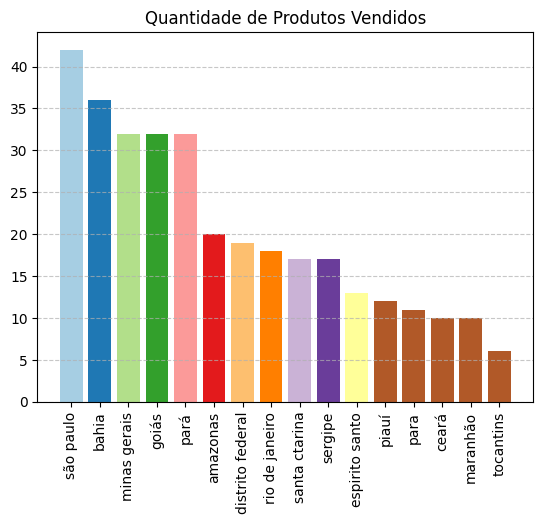

In [ ]:
dados['Localização'] = dados['Localização'].str.lower()
contagem_loc = dados['Localização'].value_counts()

cores = plt.cm.Paired(range(len(contagem_loc)))

plt.bar(contagem_loc.index, contagem_loc.values, color=cores)
plt.title('Quantidade de Produtos Vendidos')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


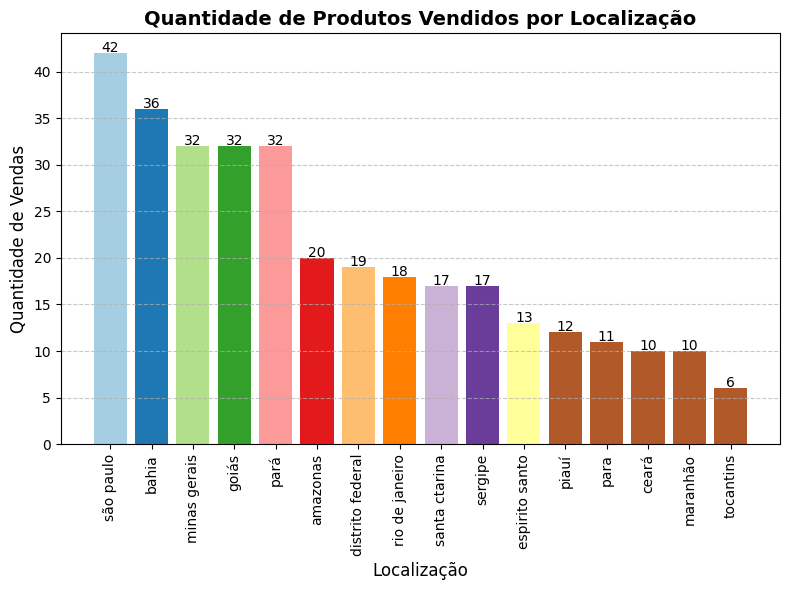

In [ ]:
import matplotlib.pyplot as plt

# Exemplo de DataFrame

# Padronizando a coluna 'Localização' para letras minúsculas
df = pd.DataFrame(dados)
df['Localização'] = df['Localização'].str.lower()

# Contando as ocorrências por localização
contagem_localizacao = df['Localização'].value_counts()

# Definindo cores para as barras
cores = plt.cm.Paired(range(len(contagem_localizacao)))

# Criando o gráfico de barras com melhorias visuais
plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_localizacao.index, contagem_localizacao.values, color=cores)

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Produtos Vendidos por Localização', fontsize=14, fontweight='bold')
plt.xlabel('Localização', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)

# Rotacionando os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Adicionando rótulos de valor nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', fontsize=10)

# Adicionando uma grade leve no gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Melhorando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()
